In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [21]:
car_data_df=pd.read_csv(r"C:\Users\apurba.mondal\Documents\result_car_data.csv")

In [22]:
car_data_df.rename(columns={'OWNER.1':'OWNER'},inplace=True)

In [23]:
car_data_df['BRAND']=car_data_df['CAR_NAME'].str.split(' ').str[0]

In [43]:
car_data_df

,SALES_ID,CAR_NAME,YEAR,SELLING_PRICE,KM_DRIVEN,FUEL,SELLER_TYPE,OWNER,TRANSMISSION,MILEAGE,CAR_ENGINE,MAX_POWER,SEAT,POSTAL_CODE,CITY_NAME,STATE_NAME,REGIONS,SOLD,BRAND
0,1651,Tata Tiago 1.05 Revotorq XE,2017,325000,120000,Diesel,Individual,First Owner,Manual,27.28 kmpl,1047 CC,69 bhp,5,452003,Indore,Madhya Pradesh,Central,Y,Tata
1,5466,Tata Tiago 1.05 Revotorq XE,2018,450000,90000,Diesel,Individual,First Owner,Manual,27.28 kmpl,1047 CC,69 bhp,5,431001,Aurangabad,Maharashtra,West,N,Tata
2,749,Tata Tiago 1.05 Revotorq XM,2017,360000,50000,Diesel,Individual,First Owner,Manual,27.28 kmpl,1047 CC,69 bhp,5,680001,Thrissur,Kerala,South,Y,Tata
3,7101,Tata Tiago 1.05 Revotorq XT,2016,400000,60000,Diesel,Individual,First Owner,Manual,27.28 kmpl,1047 CC,69 bhp,5,248001,Dehradun,Uttarakhand,Central,N,Tata
4,5434,Tata Tiago 1.05 Revotorq XT,2017,450000,80000,Diesel,Individual,First Owner,Manual,27.28 kmpl,1047 CC,69 bhp,5,641043,Coimbatore,Tamil Nadu,South,N,Tata
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7901,4535,Volkswagen Polo 2015-2019 1.0 MPI Highline Plus,2018,678000,17000,Petrol,Individual,First Owner,Manual,18.78 kmpl,999 CC,75 bhp,5,141003,Ludhiana,Punjab,North,N,Volkswagen
7902,1684,Volkswagen Polo 2015-2019 1.0 MPI Highline Plus,2018,678000,17000,Petrol,Individual,First Owner,Manual,18.78 kmpl,999 CC,75 bhp,5,641043,Coimbatore,Tamil Nadu,South,Y,Volkswagen
7903,4747,Volkswagen Polo 2015-2019 1.0 MPI Trendline,2018,560000,14495,Petrol,Dealer,First Owner,Manual,18.78 kmpl,999 CC,75 bhp,5,680001,Thrissur,Kerala,South,N,Volkswagen
7904,3357,Volkswagen Polo 2015-2019 1.0 MPI Trendline,2018,560000,14495,Petrol,Dealer,First Owner,Manual,18.78 kmpl,999 CC,75 bhp,5,560063,Bangalore,Karnataka,South,N,Volkswagen


### Question C::----

In [171]:
brand_count_df=car_data_df.groupby('BRAND')[['SALES_ID']] .count(
).rename(columns={'SALES_ID':'NO_OF_SALES'}).sort_values(
    'NO_OF_SALES',ascending=False)
brand_count_df

,NO_OF_SALES
BRAND,
Maruti,2367
Hyundai,1360
Mahindra,758
Tata,719
Honda,466
Toyota,452
Ford,388
Chevrolet,230
Renault,228


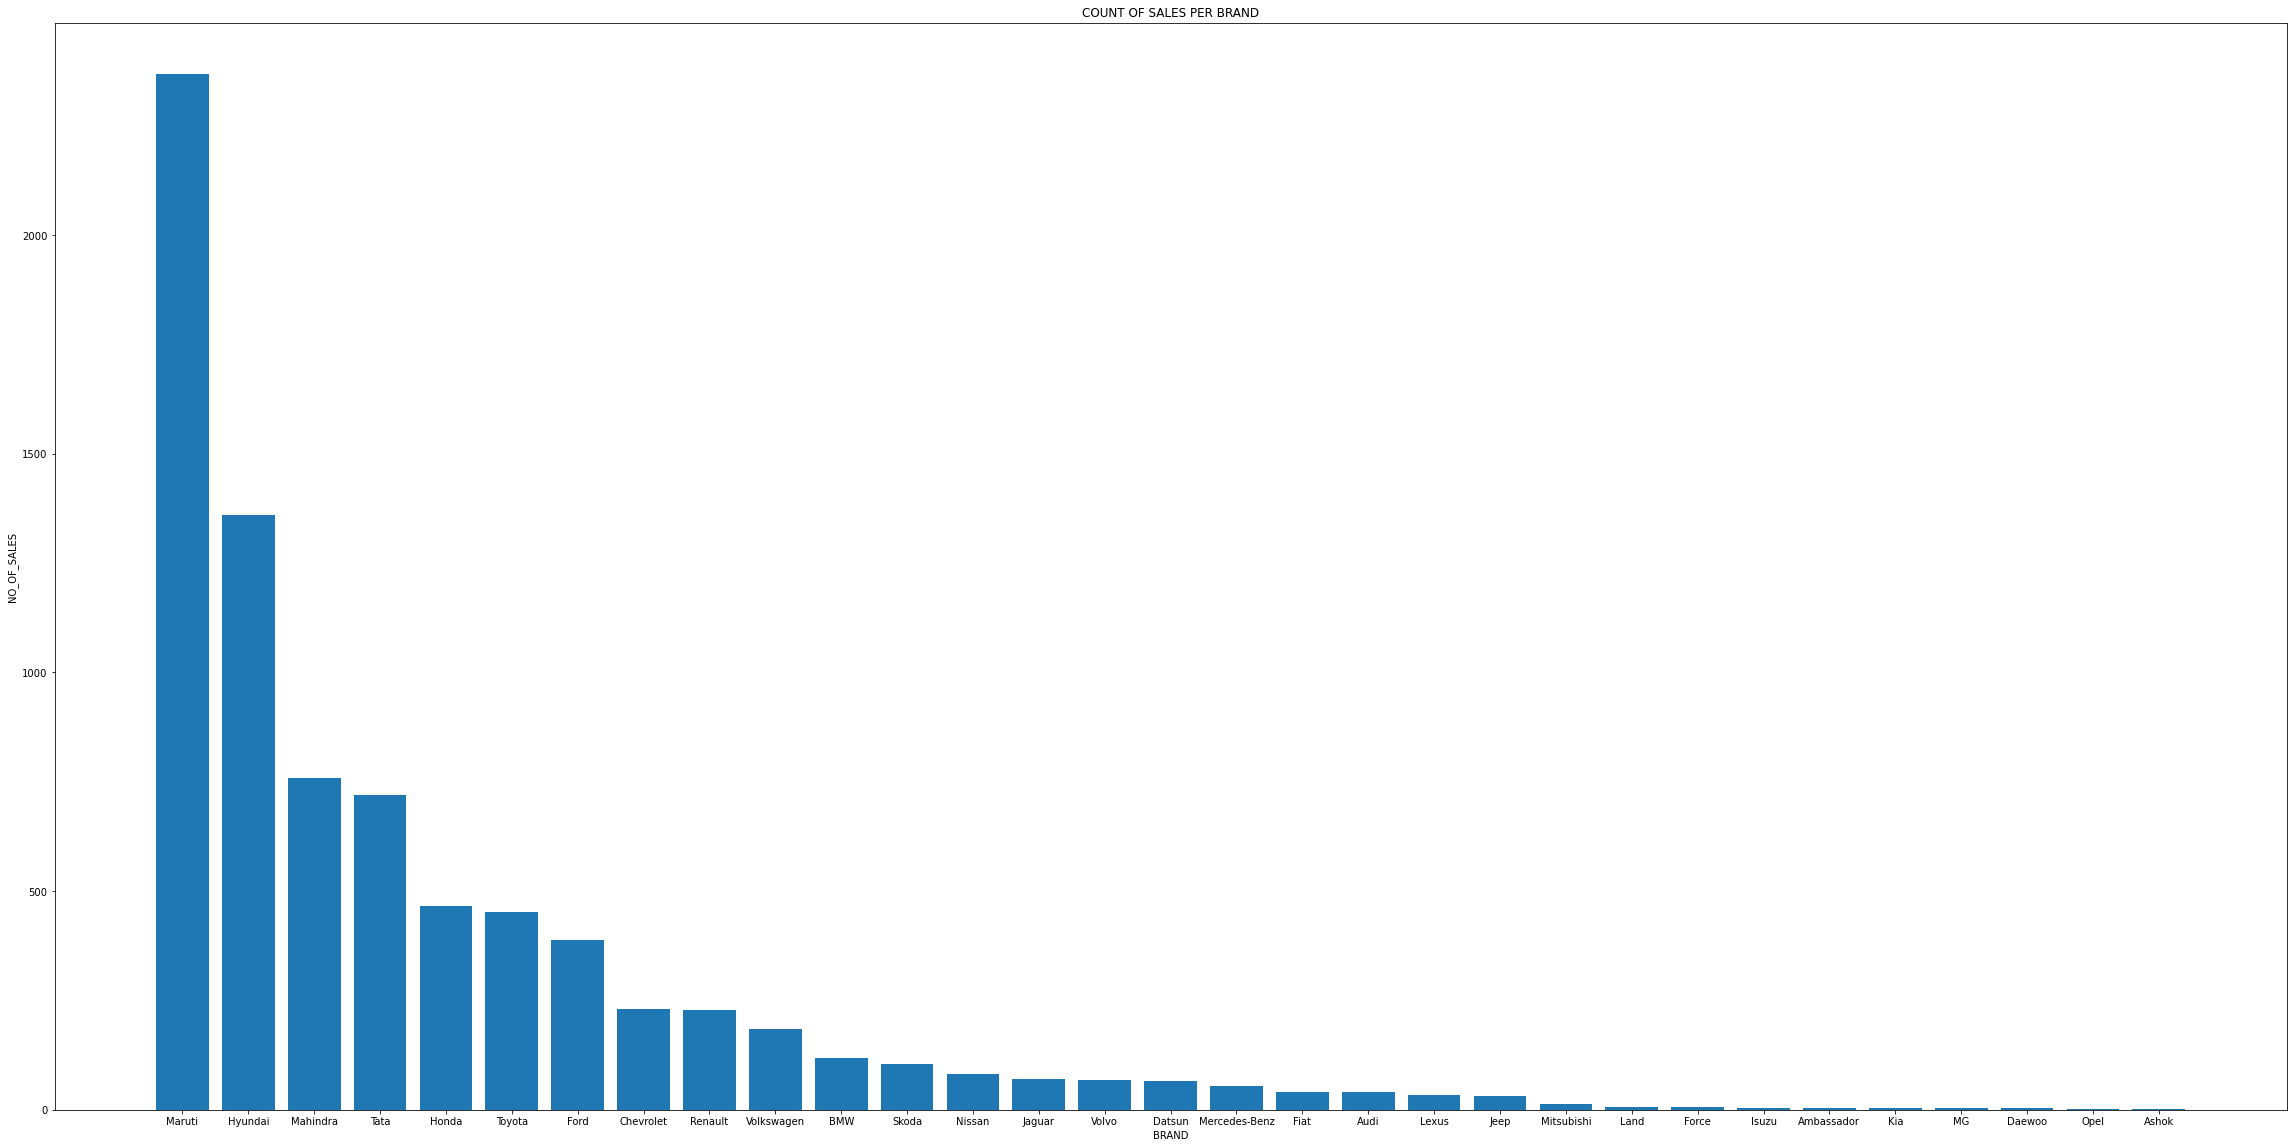

In [70]:
plt.figure(figsize=(40,20))
plt.bar(brand_count_df.index,brand_count_df.NO_OF_SALES)
plt.xlabel('BRAND')
plt.ylabel('NO_OF_SALES');
plt.title('COUNT OF SALES PER BRAND');

## Question D ::--

In [164]:
region_df=car_data_df.groupby('REGIONS').agg({'SALES_ID':'count','SELLING_PRICE':'sum'}).rename(
columns={'SALES_ID':'NUMBER_OF_SALES','SELLING_PRICE':'TOTAL_REVENUE'}).sort_values('REGIONS',ascending=True)


In [165]:
state_df1=car_data_df.groupby('STATE_NAME').agg({'SALES_ID':'count','SELLING_PRICE':'sum'}).rename(
columns={'SALES_ID':'NUMBER_OF_SALES','SELLING_PRICE':'TOTAL_REVENUE'}).sort_values('NUMBER_OF_SALES',ascending=False).head(7)

In [166]:
state_df2=car_data_df.groupby('STATE_NAME').agg({'SALES_ID':'count','SELLING_PRICE':'sum'}).rename(
columns={'SALES_ID':'NUMBER_OF_SALES','SELLING_PRICE':'TOTAL_REVENUE'}).sort_values('TOTAL_REVENUE',ascending=False).head(7)

In [167]:
city_df1=car_data_df.groupby('CITY_NAME').agg({'SALES_ID':'count','SELLING_PRICE':'sum'}).rename(
columns={'SALES_ID':'NUMBER_OF_SALES','SELLING_PRICE':'TOTAL_REVENUE'}).sort_values('NUMBER_OF_SALES',ascending=False).head(7)

In [168]:
city_df2=car_data_df.groupby('CITY_NAME').agg({'SALES_ID':'count','SELLING_PRICE':'sum'}).rename(
columns={'SALES_ID':'NUMBER_OF_SALES','SELLING_PRICE':'TOTAL_REVENUE'}).sort_values('TOTAL_REVENUE',ascending=False).head(7)

In [170]:
location_df=car_data_df.groupby(['REGIONS','STATE_NAME','CITY_NAME']).agg({'SALES_ID':'count','SELLING_PRICE':'sum'}).rename(
columns={'SALES_ID':'NUMBER_OF_SALES','SELLING_PRICE':'TOTAL_REVENUE'}).sort_values(
    ['REGIONS','STATE_NAME','NUMBER_OF_SALES','CITY_NAME'],ascending=[True,True,False,False])
location_df

NUMBER_OF_SALES  TOTAL_REVENUE
REGIONS    STATE_NAME     CITY_NAME                                   
Central    Madhya Pradesh Indore                    257      159424990
           Uttar Pradesh  Noida                     303      211556992
                          kanpur                    247      146371497
           Uttarakhand    Dehradun                  280      163735253
East       Bihar          Patna                     257      189797583
           Jharkhand      Ranchi                    276      176200987
                          Jamshedpur                247      179004995
           Odisha         Bhubaneshwar              255      159331492
           West Bengal    Kolkata                   268      161600988
North      Delhi          Delhi                     320      214853990
           Punjab         Ludhiana                  249      159501995
           Rajasthan      Jaipur                    274      160507492
North East Sikkim         Gangtok                   257      164425989
South      Andhra Pradesh Nellore                   281      206429984
           Karnataka      Mysore                    279      189105943
                          Mangalore                 279      173242139
                          Bangalore                 276      164815343
           Kerala         Kochi                     279      188043948
                          Thrissur                  270      180375992
           Tamil Nadu     Coimbatore                294      184818982
                          Vellore                   293      190692988
                          Chennai                   285      181171991
           Telangana      Hyderabad                 262      158189991
West       Gujarat        Ahmedabad                 278      187822698
                          Vadodara                  272      204684988
                          Surat                     242      160665990
           Maharashtra    Mumbai                    298      193084984
                          Aurangabad                278      192231987
                          Pune                      250      135735086

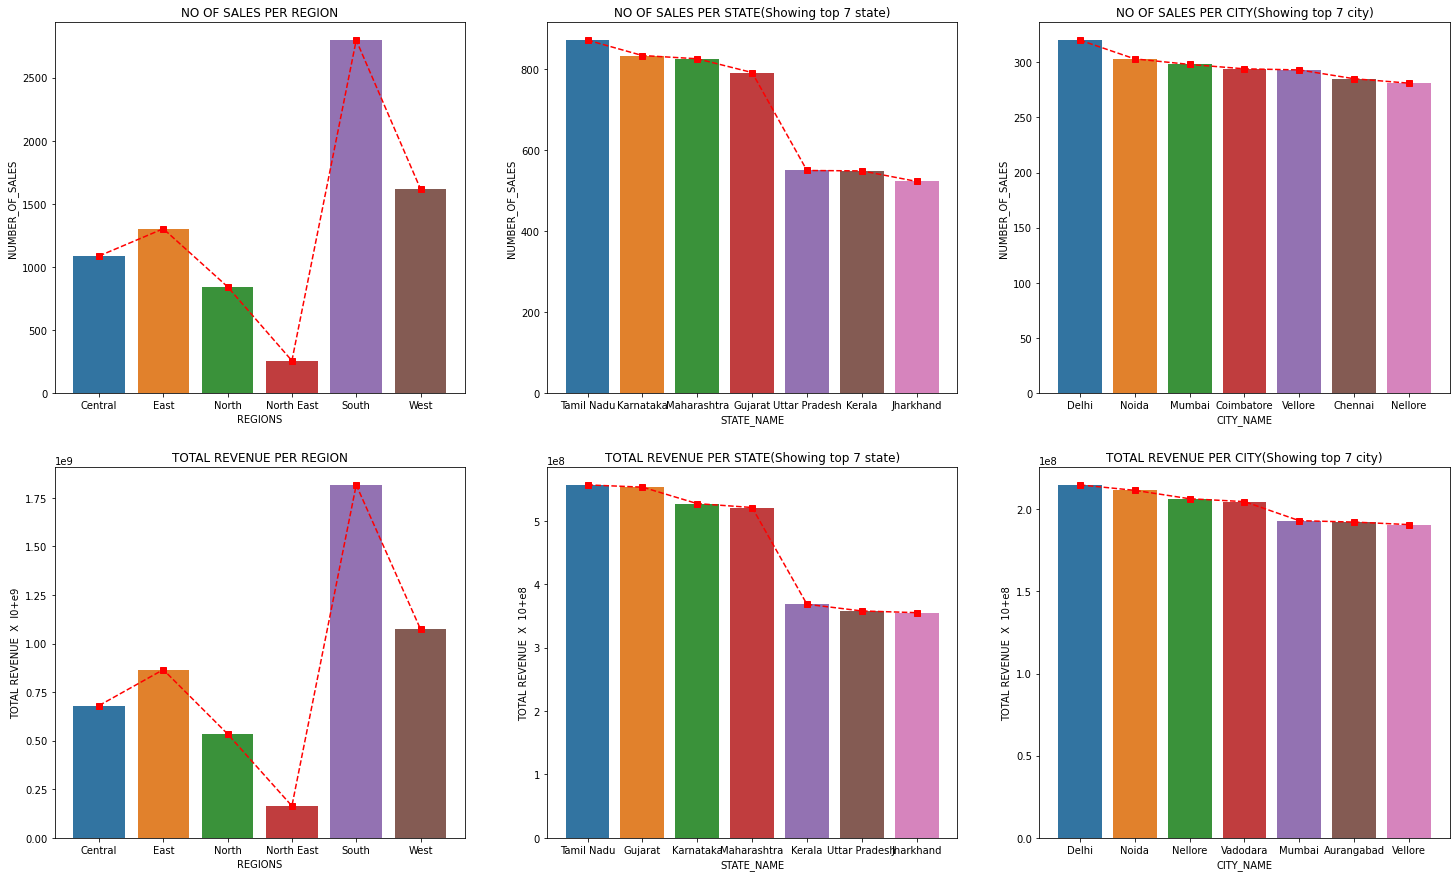

In [177]:
fig,axes=plt.subplots(2,3,figsize=(25,15))

##Chart 1:--
axes[0,0].set_title('NO OF SALES PER REGION')
sns.barplot(x=region_df.index,y=region_df.NUMBER_OF_SALES,ax=axes[0,0])
axes[0,0].plot(region_df.index,region_df.NUMBER_OF_SALES,'s--r');

##chart 2:--
axes[0,1].set_title('NO OF SALES PER STATE(Showing top 7 state)')
sns.barplot(x=state_df1.index,y=state_df1.NUMBER_OF_SALES,ax=axes[0,1])
axes[0,1].plot(state_df1.index,state_df1.NUMBER_OF_SALES,'s--r');

##chart 3:--
axes[0,2].set_title('NO OF SALES PER CITY(Showing top 7 city)')
sns.barplot(x=city_df1.index,y=city_df1.NUMBER_OF_SALES,ax=axes[0,2])
axes[0,2].plot(city_df1.index,city_df1.NUMBER_OF_SALES,'s--r');

##chart 4:--
axes[1,0].set_title('TOTAL REVENUE PER REGION')
sns.barplot(x=region_df.index,y=region_df.TOTAL_REVENUE,ax=axes[1,0])
axes[1,0].set_ylabel('TOTAL REVENUE  X  l0+e9')
axes[1,0].plot(region_df.index,region_df.TOTAL_REVENUE,'s--r');

##chart 5:--
axes[1,1].set_title('TOTAL REVENUE PER STATE(Showing top 7 state)')
sns.barplot(x=state_df2.index,y=state_df2.TOTAL_REVENUE,ax=axes[1,1])
axes[1,1].set_ylabel('TOTAL REVENUE  X  10+e8')
axes[1,1].plot(state_df2.index,state_df2.TOTAL_REVENUE,'s--r');

##chart 6:--
axes[1,2].set_title('TOTAL REVENUE PER CITY(Showing top 7 city)')
sns.barplot(x=city_df2.index,y=city_df2.TOTAL_REVENUE,ax=axes[1,2])
axes[1,2].set_ylabel('TOTAL REVENUE  X  10+e8')
axes[1,2].plot(city_df2.index,city_df2.TOTAL_REVENUE,'s--r');
